In [1]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import os
import skimage.io as io
from skimage.transform import resize
import math as ma
import yaml

(512, 544)
[-12.2, -13.8]
[-12.2, -13.8]
[-12.2, 11.8]
[-12.2, -13.75]
[14.950000000000003, 11.8]
[14.950000000000003, -13.75]
[0, 0]
hi
2797 2797
16
[  0 205 206 207 208 209 216 217 218 224 227 228 232 236 247 254]
[236, 243]
0
254


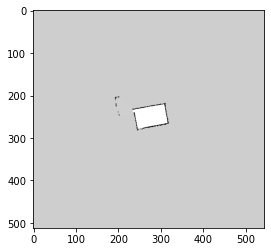

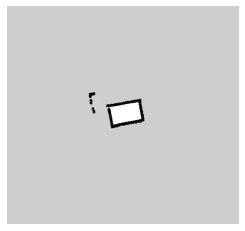

In [34]:
filename = "maps/my_map - Copy.pgm"           #created a copy of the map with all the extra white space taken away
im = io.imread(filename)

print(im.shape)
rows=im.shape[0]     #number of rows in the image
cols=im.shape[1]     #number of columns in the image
#print(im[250][250])

f = open("maps/my_map.yaml","r")
#print(f.read())
parsed_yaml_file = yaml.load(f, Loader=yaml.FullLoader)
#print(parsed_yaml_file["origin"])

resolution=parsed_yaml_file["resolution"]
origin=[0,0]
origin[0]=parsed_yaml_file["origin"][0]
origin[1]=parsed_yaml_file["origin"][1]
print(origin)

leftBotLoc=[0,0]
leftBotLoc[0]=parsed_yaml_file["origin"][0]
leftBotLoc[1]=parsed_yaml_file["origin"][1]

def genExtraBorderedimage(im):   #The extra bordered image is the one that is to be used, as it helps us make sure
    ebim=np.copy(im)             #that the robot does not collide with the wall.
    for i in range(rows):        #One problem this function could cause is that the coordinate (0,0) will be merged with the 
        for j in range(cols):    #border. But that doesn't matter, because we use this code to generate a collision-free path
            if im[i][j]<10:      
                for x in range(5):
                    for y in range(5):
                        ebim[i+x][j+y]=0
    return ebim

ebim=genExtraBorderedimage(im)     

print(leftBotLoc)        #real coordinates of the left-most bottom pixel

#locationMatrix = [[[0,0]]*cols]*rows
#for j in range(rows):
#    for i in range(cols):
#        locationMatrix[j][i]=[x0,y0]
#        #print(j,i,x0,y0,locationMatrix[j][i])
#        x0=x0+resolution
#    y0=y0-resolution
#    x0=x00

#print(locationMatrix[0][300])
#print(locationMatrix[0][0])
#print(locationMatrix[511][0])
#print(locationMatrix[0][543])
#print(locationMatrix[511][543])

def xyFromRowCol(rowNo,colNo):         #gets the real coordinates for a given row and column number, i.e. pixel location
    x=(colNo*resolution)+leftBotLoc[0]
    y=((rows-rowNo)*resolution)+leftBotLoc[1]
    return [x,y]

def RowColFromXY(x,y):                #gets the pixel location for a given real coordinate
    colNo=(x-leftBotLoc[0])/resolution
    rowNo=rows-((y-leftBotLoc[1])/resolution)
    return [int(rowNo),int(colNo)]


print(xyFromRowCol(0,0))
print(xyFromRowCol(511,0))
print(xyFromRowCol(0,543))
print(xyFromRowCol(511,543))

print(RowColFromXY(-12.2,11.8))

def genRequiredPath(im):            #generates an orderly path in the required region
    path=[]
    pixelPath=[]
    for i in range(0,rows,2):
        for j in range(cols):
            if im[i][j]>250:
                point=xyFromRowCol(i,j)
                path.append(point)
                pixeLoc=[i,j]
                pixelPath.append(pixeLoc)
        i=i+1
        for j in range(cols-1,-1,-1):
            if im[i][j]>250:
                point=xyFromRowCol(i,j)
                path.append(point)
                pixeLoc=[i,j]
                pixelPath.append(pixeLoc)
    return path,pixelPath
        
print("hi")
path,pixelPath=genRequiredPath(ebim)
print(len(path),len(pixelPath))

#print(path)        #The path the robot has to follow in terms of real coordinates
#print(pixelPath)    #The path the robot has to follow in terms of pixel coordinates

uni=np.unique(im)
print(len(uni))
print(uni)


loc=RowColFromXY(0,0)
print(loc)
print(ebim[loc[0]][loc[1]])
print(im[loc[0]][loc[1]])


plt.figure()
plt.imshow(im,cmap="gray")
plt.figure()
plt.imshow(ebim,cmap="gray")
plt.axis("off")
plt.show()